# Checking if modified CAMB is functional and providing correct results

In [1]:
import camb
import matplotlib.pyplot as plt
import numpy as np

## General $\beta$ parameterisation

In [2]:
beta = camb.read_ini("./inifiles/beta_test.ini")
beta_results = camb.get_results(beta)
beta_powers = beta_results.get_cmb_power_spectra(beta, CMB_unit="muK")
beta_Cl = beta_powers["total"]
lmax = beta_Cl.shape[0] - 1
aL = np.arange(beta_Cl.shape[0])

## CPL parameterisation

In [9]:
log = beta
log.DarkEnergy.wa = 0.02
log.DarkEnergy.beta_DE = -1

log_results = camb.get_results(log)
log_powers = log_results.get_cmb_power_spectra(log, CMB_unit="muK")
log_Cl = log_powers["total"]

 integral, error, tol:   13447.619649066206       -3.1295394742336669E-007   1.0000000000000001E-007


CAMBError: Error in Fortran called from calc_transfer:
ThemoData Init: failed to find end of recombination

## Plotting

### Separately

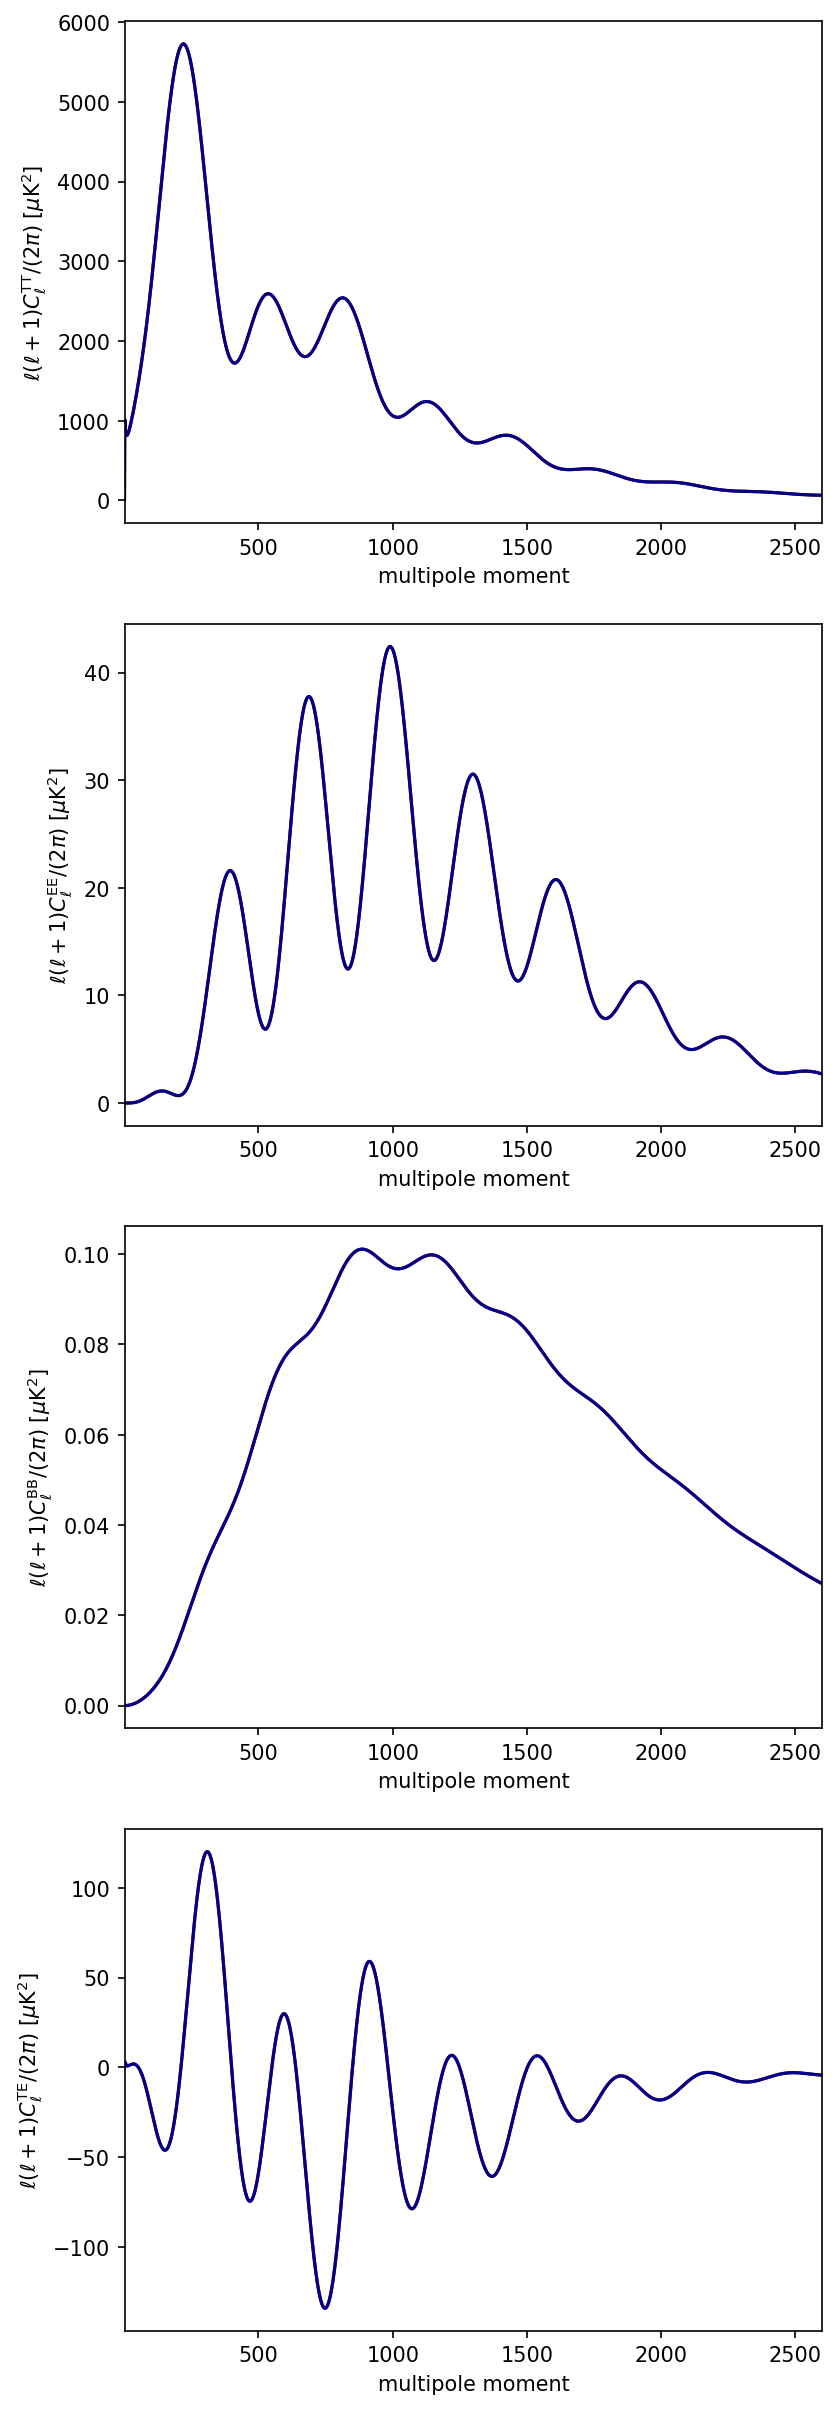

In [7]:
fig = plt.figure(figsize=(6, 20), dpi=150)
for pindx, ll in zip(range(4), ["TT", "EE", "BB", "TE"]):
    ax = fig.add_subplot(4, 1, pindx + 1)
    # starting from dipole onwards
    ax.set_xlim(2, lmax)
    ax.set_xlabel("multipole moment")
    ax.set_ylabel("$\ell(\ell+1)C_\ell^{\\rm " + ll + "}/(2\pi)$ [$\mu{\\rm K}^2$]")
    ax.plot(aL, lcdm_Cl[:, pindx], c="DarkRed")
    ax.plot(aL, cpl_Cl[:, pindx], c="DarkBlue")

### Difference

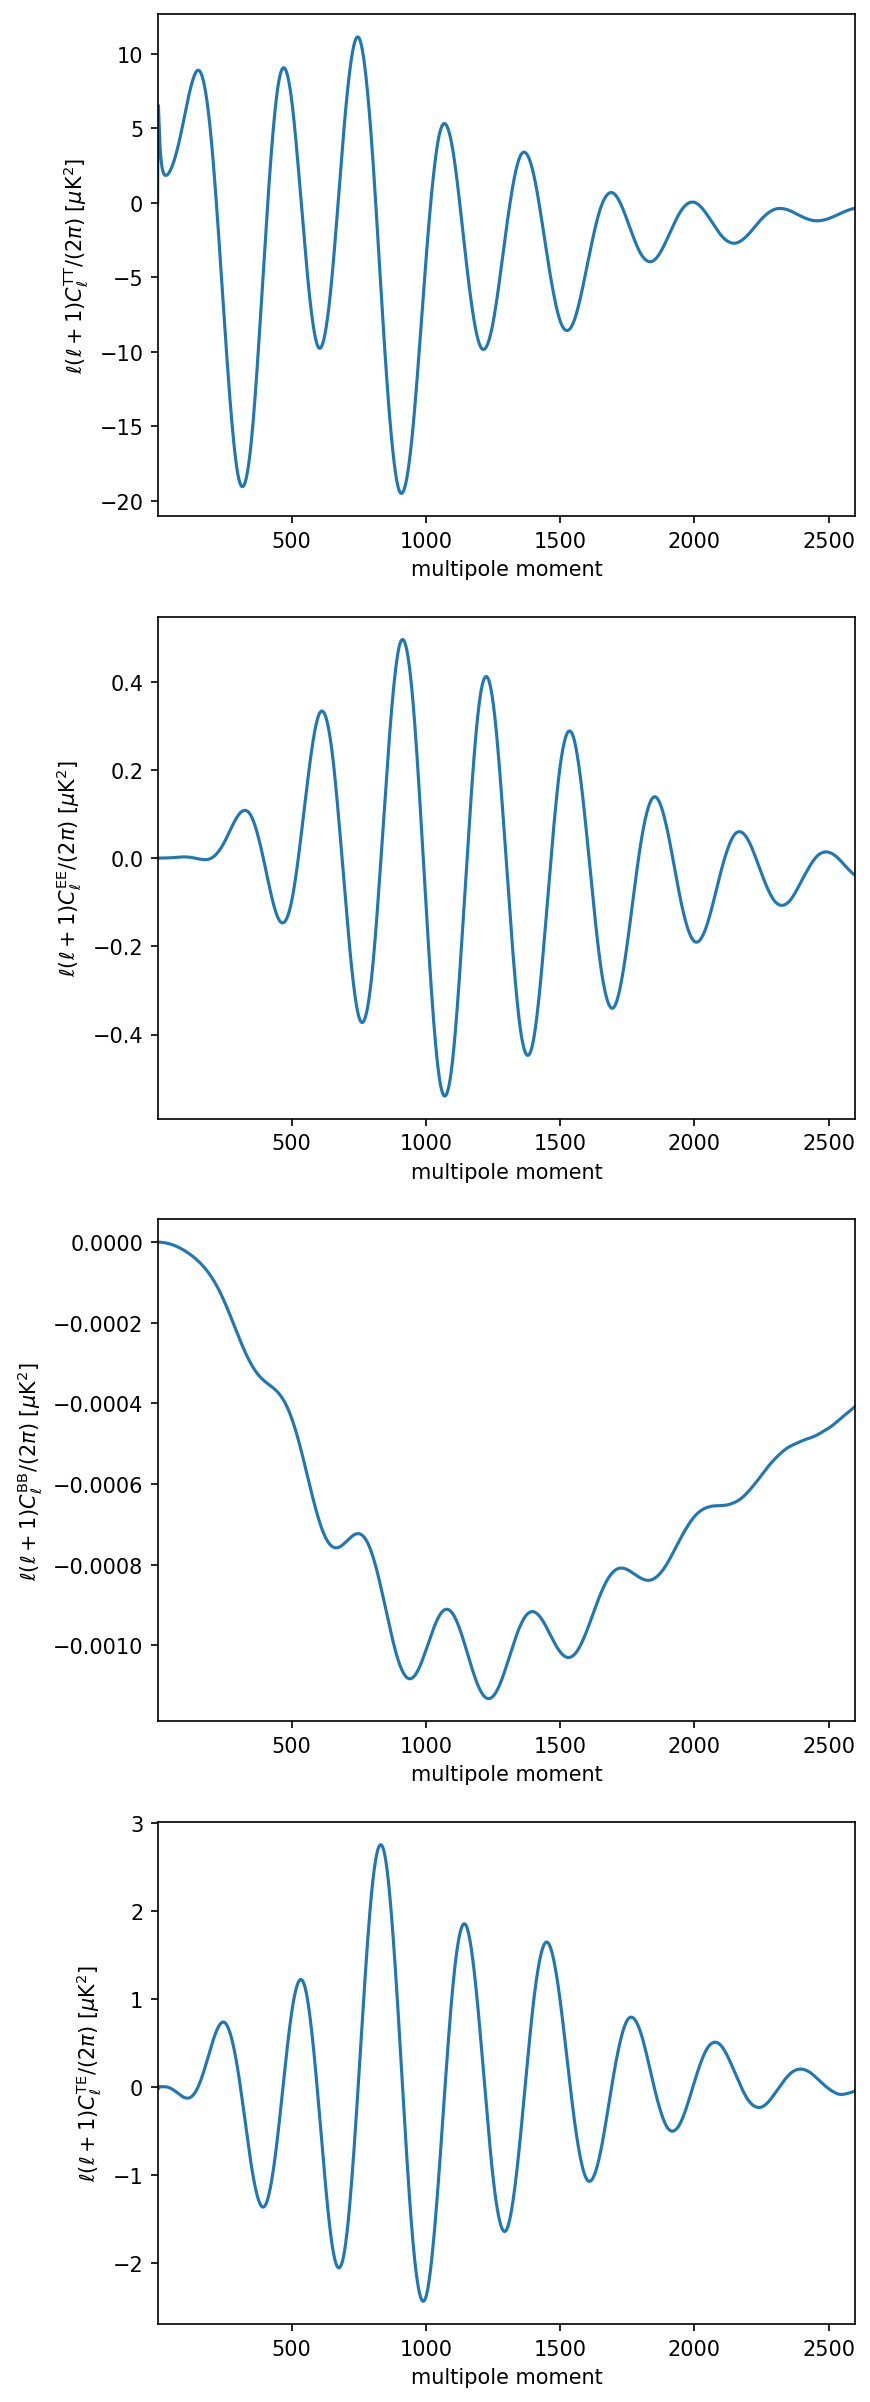

In [5]:
fig = plt.figure(figsize=(6, 20), dpi=150)
for pindx, ll in zip(range(4), ["TT", "EE", "BB", "TE"]):
    ax = fig.add_subplot(4, 1, pindx + 1)
    # starting from dipole onwards
    ax.set_xlim(2, lmax)
    ax.set_xlabel("multipole moment")
    ax.set_ylabel("$\ell(\ell+1)C_\ell^{\\rm " + ll + "}/(2\pi)$ [$\mu{\\rm K}^2$]")
    ax.plot(aL, beta_Cl[:, pindx] - log_Cl[:, pindx])